In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pprint
import math
from datetime import datetime

In [6]:
import sys, os
script_dir = sys.path[0]
print(script_dir)

DATA_PATH = os.path.join(script_dir+r'\train\train\7554\SimpleTest')
print(DATA_PATH)

D:\Data_science_project\Project\data visualization project\pandas project
D:\Data_science_project\Project\data visualization project\pandas project\train\train\7554\SimpleTest


# Preprocessing

In [102]:
for d in [d for d in os.listdir(script_dir+r'\train\train') if not d.startswith('.')]:
    d_path = os.path.join(script_dir+r'\train\train\{}\SimpleTest')
    for f in os.listdir(d_path.format(d)):
        if(f.endswith('.csv') and not f.startswith('Test Time Log')):
            f_path = d_path.format(d)
            data = pd.read_csv(f_path + '/' + f)
            data['Color'] = 0
            data.dropna(axis = 0, inplace = True)
            data = data.astype({'X' : float})
            data.rename(columns = {" Y" : "Y", 
                                    " Pressure" : "Pressure", 
                                    " TiltX" : "TiltX", 
                                    " TiltY" : "TiltY", 
                                    " Time" : "Time"}, inplace = True)
#             data['Time']=data['Time'].apply(lambda x: float(x.split(':')[0])*60+float(x.split(':')[1]))
            data.to_csv(f_path + '/' + f, index=False)
            print(data)

              X           Y  Pressure   TiltX   TiltY       Time  Color
0    925.902760  665.541979  0.045884 -4917.0   669.0  12.609985      0
1    925.902760  665.541979  0.045884 -4917.0   669.0  12.625604      0
2    926.692690  665.647303  0.082506 -4917.0   669.0  12.644568      0
3    927.008662  665.647303  0.115953 -4917.0   669.0  12.660274      0
4    927.324633  665.594641  0.140368 -4917.0   669.0  12.683815      0
..          ...         ...       ...     ...     ...        ...    ...
127  585.495785  647.004966  0.378408 -4510.0  1946.0  14.031679      0
128  584.863841  646.846980  0.382803 -4510.0  1946.0  14.047287      0
129  584.863841  646.846980  0.386954 -4510.0  1946.0  14.062910      0
130  584.653193  646.741656  0.386954 -4501.0  1991.0  14.078534      0
131  584.653193  646.741656  0.389151 -4501.0  1991.0  14.094146      0

[132 rows x 7 columns]
                X           Y  Pressure   TiltX   TiltY       Time  Color
0      946.388267  798.408130  0.18699

              X           Y  Pressure   TiltX   TiltY       Time  Color
0    608.351080  833.323017  0.107164 -3848.0  -644.0   2.727287      0
1    608.877700  833.165031  0.107164 -3848.0  -644.0   2.742911      0
2    608.877700  833.165031  0.099107 -3848.0  -644.0   2.758575      0
3    609.035685  833.323017  0.107652 -3959.0  -670.0   2.774148      0
4    608.719714  833.586326  0.129381 -4059.0  -694.0   2.789867      0
..          ...         ...       ...     ...     ...        ...    ...
498  686.132810  654.061670  0.507561 -3717.0  1573.0  16.442100      0
499  686.132810  654.061670  0.507561 -3717.0  1573.0  16.457828      0
500  686.132810  654.061670  0.507561 -3717.0  1573.0  16.473359      0
501  686.132810  654.061670  0.490227 -3717.0  1573.0  16.489129      0
502  686.448782  653.903684  0.478019 -3717.0  1573.0  16.504605      0

[503 rows x 7 columns]
               X           Y  Pressure   TiltX   TiltY       Time  Color
0     758.016399  569.381222  0.088853 

              X           Y  Pressure   TiltX   TiltY      Time  Color
0    363.999538  567.854025  0.030503 -3806.0 -1457.0  4.110047      0
1    365.052777  566.063518  0.103502 -3806.0 -1457.0  4.126918      0
2    366.158679  564.378335  0.173327 -3806.0 -1457.0  4.142553      0
3    367.422566  562.429842  0.244373 -3806.0 -1457.0  4.158266      0
4    368.581129  560.270701  0.298329 -3806.0 -1457.0  4.173884      0
..          ...         ...       ...     ...     ...       ...    ...
125  491.388844  467.585633  0.618647 -3592.0  -268.0  5.495780      0
126  491.704816  467.901605  0.604242 -3592.0  -268.0  5.495780      0
127  491.704816  467.901605  0.596918 -3592.0  -268.0  5.511434      0
128  491.704816  467.901605  0.464103 -3593.0  -232.0  5.527053      0
129  489.914309  466.953690  0.331289 -3593.0  -232.0  5.531488      0

[130 rows x 7 columns]
              X           Y  Pressure   TiltX   TiltY       Time  Color
0    370.160989  626.730107  0.030503 -4014.0  2039.

               X           Y  Pressure   TiltX  TiltY       Time  Color
0     900.625014  645.319783  0.563470  3219.0 -461.0   1.981885      0
1     895.411479  647.373600  0.598138  3219.0 -461.0   1.981885      0
2     894.568888  647.689572  0.589593  3219.0 -461.0   1.997484      0
3     890.987874  648.848135  0.554681  3219.0 -461.0   2.013124      0
4     889.513339  649.480079  0.554681  3219.0 -461.0   2.032528      0
..           ...         ...       ...     ...    ...        ...    ...
261  1010.951842  623.254417  0.282460  3397.0 -704.0  18.854055      0
262  1010.951842  623.254417  0.282460  3397.0 -704.0  18.875164      0
263  1011.267814  623.307079  0.284413  3397.0 -704.0  18.890917      0
264  1011.899757  623.201755  0.284413  3397.0 -704.0  18.906504      0
265  1012.163067  623.096431  0.284413  3397.0 -704.0  18.906504      0

[266 rows x 7 columns]
               X           Y  Pressure   TiltX   TiltY       Time  Color
0     933.012126  761.966047  0.581781 

              X           Y  Pressure   TiltX   TiltY      Time  Color
0    295.538977  745.219540  0.378897  4237.0  1762.0  4.178979      0
1    295.538977  745.219540  0.402335  4237.0  1762.0  4.194613      0
2    296.644878  745.430188  0.410391  4237.0  1762.0  4.210361      0
3    298.856681  745.693498  0.428458  4237.0  1762.0  4.225981      0
4    301.015822  745.640836  0.430411  4237.0  1762.0  4.241561      0
..          ...         ...       ...     ...     ...       ...    ...
388  838.536552  754.172075  0.708980  2107.0   636.0  9.624996      0
389  841.748932  760.649498  0.708980  2107.0   636.0  9.624996      0
390  842.538861  762.071371  0.705318  2107.0   636.0  9.657197      0
391  844.592678  765.494399  0.695064  2107.0   636.0  9.657197      0
392  845.224622  766.336990  0.668940  2107.0   636.0  9.657197      0

[393 rows x 7 columns]
              X           Y  Pressure   TiltX   TiltY       Time  Color
0    618.672826  842.749509  0.140124  2408.0 -1660.

               X           Y  Pressure   TiltX  TiltY       Time  Color
0     822.211341  558.427532  0.117174  1310.0 -146.0   2.194563      0
1     821.316087  560.165377  0.279530  1310.0 -146.0   2.210093      0
2     820.526158  560.955307  0.478996  1310.0 -146.0   2.225887      0
3     818.682989  562.745814  0.558587  1310.0 -146.0   2.241397      0
4     818.261693  563.219771  0.585931  1310.0 -146.0   2.241397      0
...          ...         ...       ...     ...    ...        ...    ...
1049  783.399469  627.730685  0.745846  1725.0  245.0  22.563658      0
1050  783.083497  627.309389  0.739742  1725.0  245.0  22.563658      0
1051  782.767525  626.888093  0.715328  1725.0  245.0  22.582483      0
1052  782.135581  625.624206  0.630121  1725.0  245.0  22.586067      0
1053  782.030258  625.097586  0.586175  1725.0  245.0  22.586067      0

[1054 rows x 7 columns]
              X           Y  Pressure   TiltX  TiltY       Time  Color
0    699.456288  657.958656  0.491691  3

            X           Y  Pressure    TiltX   TiltY       Time  Color
0    708.6525  709.840000  0.229492   9787.0  7284.0   3.281161      0
1    708.6525  709.840000  0.233398  10123.0  7054.0   3.300836      0
2    708.6525  709.840000  0.368896  10942.0  6725.0   3.300836      0
3    708.6525  709.840000  0.386963  11072.0  6688.0   3.315862      0
4    708.3675  709.713333  0.428955  11391.0  6643.0   3.332404      0
..        ...         ...       ...      ...     ...        ...    ...
657  879.2250  695.020000  0.912109  11192.0  6959.0  13.001655      0
658  879.3675  695.780000  0.892578  11192.0  6959.0  13.029744      0
659  879.6525  696.033333  0.884277  11192.0  6959.0  13.045041      0
660  879.2250  696.286667  0.812744  11167.0  6931.0  13.069696      0
661  878.9400  696.286667  0.655762  11167.0  6931.0  13.070694      0

[662 rows x 7 columns]
            X           Y  Pressure    TiltX    TiltY      Time  Color
0    945.0600  642.453333  0.220215  12502.0  12514.0

            X           Y  Pressure    TiltX    TiltY       Time  Color
0    489.3450  454.986667  0.073242  12791.0   9641.0   5.810549      0
1    489.6300  454.986667  0.077148  12791.0   9641.0   5.826173      0
2    489.6300  454.986667  0.135986  12795.0   9589.0   5.841835      0
3    490.2000  454.860000  0.155518  12795.0   9589.0   5.841835      0
4    490.3425  454.860000  0.164062  12795.0   9589.0   5.857421      0
..        ...         ...       ...      ...      ...        ...    ...
278  679.1550  440.800000  0.430908  12035.0  10051.0  10.285449      0
279  679.7250  440.926667  0.424316  12035.0  10051.0  10.285449      0
280  679.7250  440.926667  0.417725  12035.0  10051.0  10.316448      0
281  680.2950  440.673333  0.395264  12035.0  10051.0  10.316448      0
282  681.0075  440.420000  0.362549  12035.0  10051.0  10.316448      0

[283 rows x 7 columns]
            X           Y  Pressure    TiltX    TiltY       Time  Color
0    802.5600  304.760000  0.058594  106

           X           Y  Pressure    TiltX   TiltY       Time  Color
0    485.070  323.886667  0.107178  11211.0  7272.0   2.903829      0
1    485.070  323.886667  0.107178  11196.0  7252.0   2.919450      0
2    485.070  323.886667  0.143066  11147.0  7188.0   2.935071      0
3    485.070  323.886667  0.202881  11101.0  7132.0   2.950694      0
4    485.070  323.886667  0.229004  11101.0  7132.0   2.950694      0
..       ...         ...       ...      ...     ...        ...    ...
729  649.515  486.400000  0.222168  10242.0  6680.0  19.807214      0
730  649.515  486.400000  0.214111  10242.0  6680.0  19.822994      0
731  649.515  486.400000  0.204590  10242.0  6680.0  19.822994      0
732  649.515  486.400000  0.204590  10242.0  6680.0  19.838751      0
733  649.515  486.400000  0.149170  10242.0  6680.0  19.838751      0

[734 rows x 7 columns]
            X           Y  Pressure    TiltX   TiltY       Time  Color
0    445.0275  524.526667  0.260254  10269.0  6794.0   3.284674  

            X           Y  Pressure    TiltX   TiltY      Time  Color
0    479.6550  777.480000  0.484375  12467.0  8577.0  2.233886      0
1    478.0875  776.720000  0.514160  12467.0  8577.0  2.248519      0
2    475.9500  772.286667  0.551758  12467.0  8577.0  2.249514      0
3    475.6650  771.526667  0.565430  12467.0  8577.0  2.264197      0
4    474.9525  768.866667  0.602295  12470.0  8612.0  2.279384      0
..        ...         ...       ...      ...     ...       ...    ...
412  550.6200  753.666667  1.000000  12176.0  8418.0  9.012523      0
413  550.3350  753.793333  0.994385  12176.0  8418.0  9.013519      0
414  550.3350  753.793333  0.991211  12176.0  8418.0  9.035050      0
415  550.3350  753.793333  0.988037  12176.0  8418.0  9.048787      0
416  550.3350  754.173333  0.901123  12176.0  8418.0  9.054998      0

[417 rows x 7 columns]
            X           Y  Pressure    TiltX    TiltY       Time  Color
0    559.7400  431.933333  0.342041  10640.0  12987.0   3.438102

            X           Y  Pressure    TiltX    TiltY       Time  Color
0    485.9250  590.646667  0.102539  11954.0   9521.0   3.090342      0
1    485.9250  590.646667  0.107910  11954.0   9521.0   3.103143      0
2    485.3550  590.773333  0.234375  11957.0   9493.0   3.118499      0
3    485.3550  590.773333  0.291260  11964.0   9431.0   3.134915      0
4    485.3550  590.773333  0.335938  11964.0   9431.0   3.150165      0
..        ...         ...       ...      ...      ...        ...    ...
461  592.0875  394.313333  0.491455  11622.0  10651.0  13.480676      0
462  593.2275  394.313333  0.491455  11622.0  10651.0  13.511620      0
463  593.6550  394.060000  0.493652  11622.0  10651.0  13.521964      0
464  593.6550  394.060000  0.469238  11575.0  10619.0  13.528536      0
465  593.9400  393.806667  0.458984  11523.0  10584.0  13.535410      0

[466 rows x 7 columns]
           X           Y  Pressure    TiltX    TiltY      Time  Color
0   508.7250  405.333333  0.249512  12023.

            X           Y  Pressure    TiltX    TiltY       Time  Color
0    686.5650  437.633333  0.436035  10563.0  10960.0   1.687513      0
1    686.4225  437.760000  0.462646  10451.0  11284.0   1.709710      0
2    686.2800  438.520000  0.460449  10451.0  11284.0   1.725363      0
3    686.4225  438.900000  0.471680  10451.0  11284.0   1.741317      0
4    686.4225  438.900000  0.502686  10451.0  11284.0   1.756836      0
..        ...         ...       ...      ...      ...        ...    ...
283  842.4600  634.980000  0.875732   9148.0  10345.0  10.596832      0
284  842.4600  634.980000  0.872314   9129.0  10347.0  10.612347      0
285  842.6025  634.093333  0.858154   9129.0  10347.0  10.628061      0
286  842.3175  633.586667  0.846924   9115.0  10348.0  10.643513      0
287  842.0325  632.573333  0.776367   9097.0  10349.0  10.643513      0

[288 rows x 7 columns]
             X           Y  Pressure   TiltX   TiltY       Time  Color
0    1023.0075  533.393333  0.045898  503

             X           Y  Pressure   TiltX   TiltY       Time  Color
0     304.0950  345.420000  0.076416  5281.0  8821.0   6.939068      0
1     298.1100  326.040000  0.071045  5281.0  8821.0   7.578318      0
2     298.1100  326.040000  0.078369  5281.0  8821.0   7.594301      0
3     297.8250  325.913333  0.090088  5281.0  8821.0   7.616100      0
4     297.8250  325.913333  0.139160  5281.0  8821.0   7.617106      0
...        ...         ...       ...     ...     ...        ...    ...
1465  295.9725  418.380000  0.960938  8502.0  7603.0  27.281210      0
1466  296.9700  417.113333  0.932373  8419.0  7633.0  27.297233      0
1467  297.9675  415.340000  0.888428  8335.0  7670.0  27.318867      0
1468  298.8225  412.553333  0.765625  8229.0  7726.0  27.318867      0
1469  299.1075  411.160000  0.683594  8165.0  7765.0  27.318867      0

[1470 rows x 7 columns]
           X           Y  Pressure   TiltX   TiltY      Time  Color
0    894.045  346.686667  0.183594  4847.0  8845.0  3.7

            X           Y  Pressure    TiltX    TiltY       Time  Color
0    369.6450  377.466667  0.428711  10091.0  10688.0   2.474164      0
1    369.9300  377.340000  0.435547  10215.0  10796.0   2.496312      0
2    372.6375  376.580000  0.435547  11071.0  11411.0   2.511934      0
3    376.3425  376.453333  0.431152  11421.0  11659.0   2.511934      0
4    377.6250  376.580000  0.438477  11484.0  11683.0   2.527555      0
..        ...         ...       ...      ...      ...        ...    ...
889  763.2300  366.320000  1.000000   7648.0   7344.0  14.024170      0
890  763.3725  366.573333  1.000000   7648.0   7344.0  14.039412      0
891  763.6575  367.586667  1.000000   7662.0   7333.0  14.055025      0
892  763.9425  368.093333  1.000000   7662.0   7333.0  14.086277      0
893  763.9425  368.346667  0.992676   7692.0   7310.0  14.108423      0

[894 rows x 7 columns]
            X           Y  Pressure   TiltX    TiltY      Time  Color
0    563.1600  287.660000  0.153076  7431.

           X           Y  Pressure    TiltX    TiltY       Time  Color
0   887.9175  395.960000  0.394531  11987.0  11330.0   3.130375      0
1   886.0650  395.453333  0.418701  11987.0  11330.0   3.130375      0
2   885.6375  395.453333  0.418701  11987.0  11330.0   3.146656      0
3   885.2100  395.453333  0.418701  11987.0  11330.0   3.168022      0
4   883.6425  395.960000  0.349365  11987.0  11330.0   3.168022      0
..       ...         ...       ...      ...      ...        ...    ...
83  724.0425  707.306667  0.750244  10015.0   8951.0  12.028182      0
84  722.6175  708.953333  0.764893  10016.0   9038.0  12.043310      0
85  721.4775  710.853333  0.709717  10011.0   9107.0  12.058953      0
86  723.0450  712.626667  0.664795  10170.0   9124.0  12.090223      0
87  727.1775  713.766667  0.482422  10170.0   9124.0  12.096736      0

[88 rows x 7 columns]
            X           Y  Pressure    TiltX    TiltY      Time  Color
0    940.5000  405.966667  0.100830  12059.0  11165.0 

            X           Y  Pressure   TiltX   TiltY       Time  Color
0    854.1450  578.106667  0.275391  5416.0  7612.0   1.766161      0
1    854.7150  578.233333  0.280029  5416.0  7612.0   1.781782      0
2    855.4275  578.486667  0.339844  5416.0  7612.0   1.781782      0
3    855.8550  578.613333  0.358154  5416.0  7612.0   1.797403      0
4    856.8525  578.486667  0.426758  5416.0  7612.0   1.813029      0
..        ...         ...       ...     ...     ...        ...    ...
699  678.7275  507.173333  1.000000  5266.0  9834.0  15.902190      0
700  678.7275  507.173333  0.992676  5266.0  9834.0  15.917841      0
701  678.7275  507.173333  0.987793  5266.0  9834.0  15.933598      0
702  678.3000  507.553333  0.963379  5266.0  9834.0  15.949188      0
703  677.3025  509.073333  0.872070  5266.0  9834.0  15.964589      0

[704 rows x 7 columns]
            X           Y  Pressure   TiltX    TiltY       Time  Color
0    822.5100  519.840000  0.229492  5054.0  10127.0   3.436452  

# Coding time

In [150]:
##Function zone
def plot_images(path):
    counter = 0
    for f in os.listdir(path):
        file_path = os.path.join(path+'\\'+f)
        if(f.split(".")[1] == "csv" and f != "Test Time Log.csv"):
            counter += 1
                
    fig, ax = plt.subplots(counter,2)
    fig.set_figheight(150)
    fig.set_figwidth(15)
    index = 0
    
    print("Plotting {0} images".format(counter))
    for f in os.listdir(path):
        file_path = os.path.join(path+'\\'+f)
        if(f.split(".")[1] == "csv" and f != "Test Time Log.csv"):
            data = pd.read_csv(file_path)
            #Plot picture
            ax[index,0].scatter(data['X'], data['Y'])
            ax[index,0].set_title(f + " (Image)")
            ax[index,0].set_xlabel('X')
            ax[index,0].set_ylabel('Y')
            ax[index,0].set_xlim(data['X'].min()-50, data['X'].max()+50)
            ax[index,0].set_ylim(data['Y'].min()-50, data['Y'].max()+100)
            ax[index,0].invert_yaxis()
            
            ax[index,1].scatter(x=data['X'], y=data['Y'], c=data['Color'], cmap='viridis')
            ax[index,1].set_title(f + " (Image Colored lines)")
            ax[index,1].set_xlabel('X')
            ax[index,1].set_ylabel('Y')
            ax[index,1].set_xlim(data['X'].min()-50, data['X'].max()+50)
            ax[index,1].set_ylim(data['Y'].min()-50, data['Y'].max()+100)
            ax[index,1].invert_yaxis()
            
            
            #Plot pressure
#             ax[index,1].plot(data.index, data['Pressure'])
#             ax[index,1].set_title(f + " (Pressure)")
#             ax[index,1].set_ylabel('Pressure')
#             ax[1,index].set_xlim(data['X'].min()-50, data['X'].max()+50)
#             ax[1,index].set_ylim(data['Pressure'].min()-50, data['Pressure'].max()+100)
            index += 1
      
def calc_pen_raises(path, time_epsilo):
    result = {}
    for f in os.listdir(path):
        file_path = os.path.join(path+'\\'+f)
        if(f.split(".")[1] == "csv" and f != "Test Time Log.csv"):
            data = pd.read_csv(file_path)
            lift_count = 0
            for index in (data.index[:-1]):
                if(data["Time"][index+1] - data["Time"][index] > time_epsilo):
                    lift_count += 1
            result[f.split(".")[0]] = lift_count
            
    plt.figure(figsize=(15,10))
    plt.bar(range(len(result)), list(result.values()), align='center')
    plt.xlabel("CSV file number")
    plt.ylabel("Number of pen raises")
    plt.grid()
    plt.xticks(range(len(result)), list(result.keys()))
    
def calc_lines1(path):
    result = {}
    for f in os.listdir(path):
        file_path = os.path.join(path+'\\'+f)
        if(f.split(".")[1] == "csv" and f != "Test Time Log.csv"):
            data = pd.read_csv(file_path)
            
            dot_count = 0
            pressure_sum = 0
            length = 0
            properties = {}
            line_count = 0
            property_list = []
            colors = [0]
            for index in (data.index[:-1]):
                colors.append(line_count)
                if((data["TiltX"][index] == data["TiltX"][index+1]) and (data["TiltY"][index] == data["TiltY"][index+1])):
                    flag = True #Is a part of a line
                    dot_count += 1
                    pressure_sum += data['Pressure'][index]
                    length += math.sqrt(math.pow(data["X"][index] - data["X"][index+1],2) + math.pow(data["Y"][index] - data["Y"][index+1],2))
                else:
                    if(flag and (length >= 50)):
                        dot_count += 1
                        pressure_sum += data['Pressure'][index]
                        pressure_avg = pressure_sum / dot_count
                        line_count += 1
                        property_list.append(pressure_avg)
                        property_list.append(length)
                        properties[line_count] = property_list
                    dot_count = 0
                    pressure_sum = 0
                    length = 0
                    property_list = []
                    flag = False
            
            data['Color'] = colors
            data.to_csv(file_path, index=False)
            result[f.split(".")[0]] = properties
            
    pprint.pprint(result)

In [151]:
calc_lines1(DATA_PATH)

{'1': {1: [0.2579465018851416, 55.18938880270908],
       2: [0.36349126994609815, 56.888674612054984]},
 '10': {1: [0.5793968741342707, 133.50593326496022],
        2: [0.35814871305021745, 52.93320890389411],
        3: [0.5246361491806579, 52.75880718980769],
        4: [0.3659338681470781, 72.81928632050189],
        5: [0.45341311262122225, 70.8835621295977],
        6: [0.5446402664695467, 91.75122328398437],
        7: [0.37684492132765174, 205.57459662269912]},
 '11': {1: [0.7134647654450458, 111.40460027899671],
        2: [0.7268408392156873, 71.12008904990098],
        3: [0.4200045801699162, 55.624312262945764]},
 '12': {1: [0.32138721203362514, 163.79428436294782],
        2: [0.5086784862809711, 82.54237684532632],
        3: [0.4757106221564437, 61.16968520661416],
        4: [0.7258259057998658, 52.03282712139114]},
 '13': {1: [0.3132300799091656, 122.98833590308095],
        2: [0.21846025668341537, 50.65941396006943],
        3: [0.40651764074961344, 71.93108446854626

In [43]:
# data = pd.read_csv(data_path)

Plotting 21 images


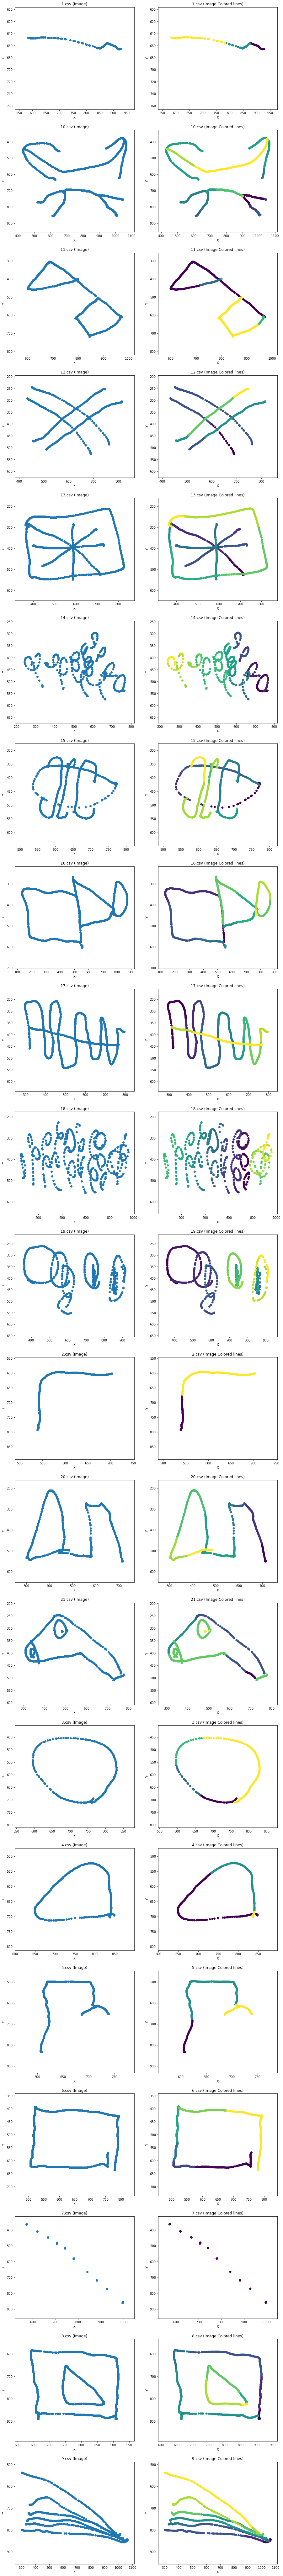

In [147]:
plot_images(DATA_PATH)

(0.0, 889.934634484351)

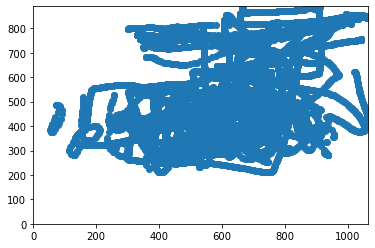

In [113]:
plt.scatter(data['X'], data['Y'])
plt.xlim(0,data['X'].max())
plt.ylim(0,data['Y'].max())